## Starter: Hourly Energy Consumption

PJM Interconnection LLC (PJM) es una organización regional de transmisión (RTO) en Estados Unidos. Forma parte de la red de Interconexión del Este y opera un sistema de transmisión eléctrica que da servicio a todo o parte de Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, Nueva Jersey, Carolina del Norte, Ohio, Pensilvania, Tennessee, Virginia, Virginia Occidental y el Distrito de Columbia.

Los datos de consumo eléctrico por hora proceden de la página web de PJM y se expresan en megavatios (MW).

Las regiones han cambiado a lo largo de los años, por lo que es posible que los datos sólo aparezcan para determinadas fechas por región.

Esta información es tomada del link: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption?resource=download&select=pjm_hourly_est.csv

Carga combinada de todas las regiones:

- American Electric Power (AEP)

- Commonwealth Edison (ComEd)

- Dayton Power and Light Company

- Duke Energy Ohio/Kentucky (DEOK)

- Dominion Virginia Power (DOM)

- Duquesne Light Co. (DUQ)

- East Kentucky Power Cooperative (EKPC)

- FirstEnergy (FE)

- Northern Illinois Hub (NI)

- Región Este de PJM: 2001-2018 (PJME)

- Región Oeste del PJM: 2001-2018 (PJMW)

- Carga combinada de PJM: 1998-2001 (PJM_Load)


In [160]:
# Paquetes a utilizar
# Manipulación de archivos
# ==============================================================================
import os

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

El conjunto de datos empleados es 'pjm_hourly_est', el cual continene todos los archivos combinados que ofrece el sitio web. El dataframe contiene 513 columnas y 178262 registros. 

In [175]:
# Descarga de datos
# ==============================================================================
df=pd.read_csv('archive\\pjm_hourly_est.csv')
df.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


Ulizamos el metodo fillna() para reemplazar todos los valoresque se utilizaran para la operaciones posteriores

In [162]:
# Reemplazar valores Na y NaN por 0
# ==============================================================================
df=df.fillna(0)

En este paso solo sumamos las columnas PJME que correspoende al consumo de la region Este, PJMW que correspoende al consumo de la regiuon oeste y el PJM_Load correspoende al consumo de los periodos comprendidos desde el 1998 hasta 2001. al final solo dejamos la columna fecha-hora y consumo.

In [163]:
# Reduccion de tabla y sumatoria de consumo de energia
# ==============================================================================
df['Consumption']=df['PJME']+df['PJMW']+df['PJM_Load']
df=df[['Datetime','Consumption']]
df

,Datetime,Consumption
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0
...,...,...
178257,2018-01-01 20:00:00,52685.0
178258,2018-01-01 21:00:00,52124.0
178259,2018-01-01 22:00:00,50640.0
178260,2018-01-01 23:00:00,48122.0


Utilizamos el metodo .info() para determinar que columnas tienen valores nulos y el tipo de dato de cada columna.

In [164]:
# Confirmar tipos de datos de la tabla
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     178262 non-null  object 
 1   Consumption  178262 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


Utilizamos el metodo .describe() para obtener las estadisticas descriptivas que nos ayudaran a comprender mejor los resultados obtenidos al realizar las operaciones anteriores para determinar el consumo de energia. 

In [165]:
df.describe()

,Consumption
count,178262.000000
mean,36153.884703
std,7744.603984
min,17461.000000
25%,30606.000000
50%,35609.000000
75%,40711.000000
max,70743.000000


Como se puede apreciar la media y la mediana estan muy cerca una de la otra, por tal momtivo el 50% de los datos podriamos esperar que se encuentre un consumo de energia de 36153 KW a 35609 KW.

In [166]:
# Conversión del formato fecha
# ==============================================================================
df['Datetime']=pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')
df=df.sort_index()

La columna Datetime se ha almacenado como string. Para convertirla en datetime, se emplea la función pd.to_datetime(). Una vez en formato datetime, y para hacer uso de las funcionalidades de pandas, se establece como índice.

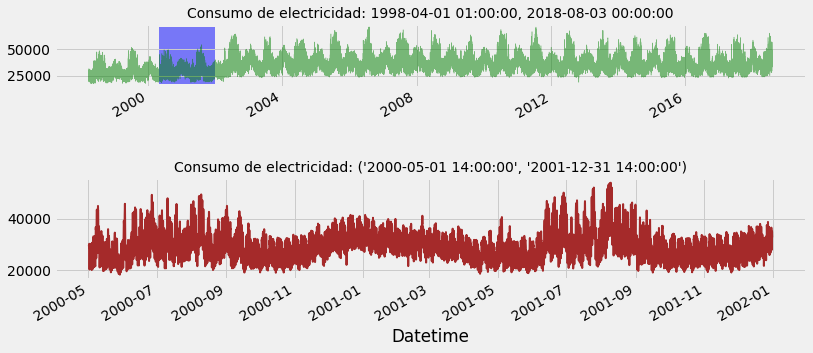

In [170]:
# Gráfico serie temporal con zoom
# ==============================================================================
zoom = ('2000-05-01 14:00:00','2001-12-31 14:00:00')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

df.Consumption.plot(ax=main_ax, c='Green', alpha=0.5, linewidth=0.5)
min_y = min(df['Consumption'])
max_y = max(df['Consumption'])
main_ax.fill_between(zoom, min_y, max_y, facecolor='Blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

df.loc[zoom[0]: zoom[1]]['Consumption'].plot(ax=zoom_ax, color='brown', linewidth=2)

main_ax.set_title(f'Consumo de electricidad: {df.index.min()}, {df.index.max()}', fontsize=14)
zoom_ax.set_title(f'Consumo de electricidad: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)

El gráfico anterior muestra que la demanda eléctrica tiene estacionalidad anual. Se observa un incremento centrado en el mes de Julio y picos de demanda muy acentuados entre enero y marzo. Adcional a ello se encuentra un incremento considerable entre el año 2000 al 2001 el cual el consumo aumento.

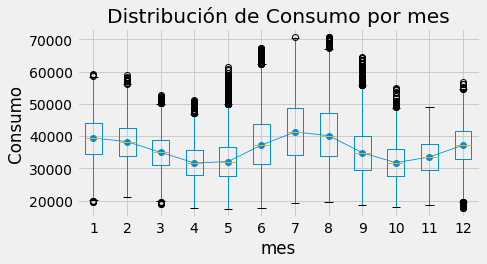

In [171]:
# Gráfico boxplot para estacionalidad anual
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3.5))
df['mes'] = df.index.month
df.boxplot(column='Consumption', by='mes', ax=ax,)
df.groupby('mes')['Consumption'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Consumo')
ax.set_title('Distribución de Consumo por mes')
fig.suptitle('');

Se observa que hay una estacionalidad anual, con valores de demanda (mediana) superiores en los meses de Junio, Julio y Agosto, y con elevados picos de demanda en los meses de Noviembre, Diciembre, Enero, Febrero y Marzo.

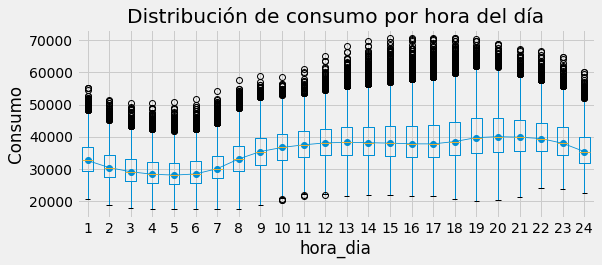

In [172]:
# Gráfico boxplot para estacionalidad diaria
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 3.5))
df['hora_dia'] = df.index.hour + 1
df.boxplot(column='Consumption', by='hora_dia', ax=ax)
df.groupby('hora_dia')['Consumption'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Consumo')
ax.set_title('Distribución de consumo por hora del día')
fig.suptitle('');

También existe una estacionalidad diaria, la demanda se reduce entre las 24 y las 6 horas.

In [174]:
# Separación datos train-val-test
# ==============================================================================
df = df.loc['1998-04-01 00:00:00': '2018-08-03 00:00:00']
fechaFinEntrenamiento = '2016-12-31 23:59:00'
fin_validacion = '2017-12-31 23:59:00'
datos_entrenamiento = df.loc[:fechaFinEntrenamiento, :]
datos_validacion   = df.loc[fechaFinEntrenamiento:fin_validacion, :]
datos_prueba = df.loc[fin_validacion:, :]

print(f"Fechas entrenamiento : {datos_entrenamiento.index.min()} --- {datos_entrenamiento.index.max()}  (n={len(datos_entrenamiento)})")
print(f"Fechas validacion : {datos_validacion.index.min()} --- {datos_validacion.index.max()}  (n={len(datos_validacion)})")
print(f"Fechas prueba     : {datos_prueba.index.min()} --- {datos_prueba.index.max()}  (n={len(datos_prueba)})")


Fechas entrenamiento : 1998-04-01 01:00:00 --- 2016-12-31 23:00:00  (n=164366)
Fechas validacion : 2017-01-01 00:00:00 --- 2017-12-31 23:00:00  (n=8760)
Fechas prueba     : 2018-01-01 00:00:00 --- 2018-08-03 00:00:00  (n=5136)


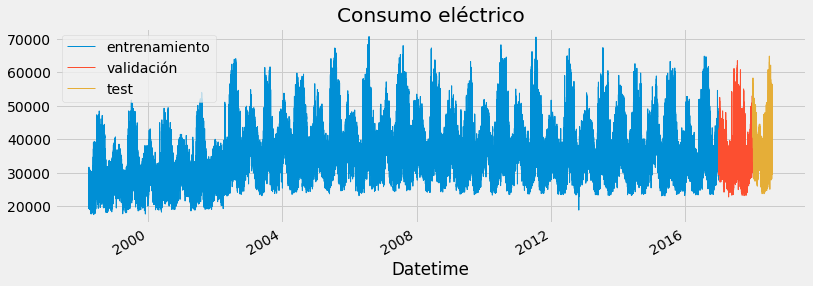

In [173]:
fig, ax = plt.subplots(figsize=(12, 4))
datos_entrenamiento.Consumption.plot(ax=ax, label='entrenamiento', linewidth=1)
datos_validacion.Consumption.plot(ax=ax, label='validación', linewidth=1)
datos_prueba.Consumption.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Consumo eléctrico')
ax.legend();

En este apartado la idea es generar un modelo de forecasting, es importante representar los valores de la serie temporal. Esto permite identificar patrones tales como tendencias y estacionalidad. El set de datos empieza el 1998-04-01 01:00:00 y termina el 2018-08-03 13:00:00. Además, para poder optimizar los hiperparámetros del modelo y evaluar su capacidad predictiva, se dividen los datos en 3 conjuntos, uno de entrenamiento, uno de validación y otro de test.